<a href="https://colab.research.google.com/github/rohan-dot/Startups-Funding/blob/main/Rohan_Datta_Purkayastha_Team_4_Startup_Funding_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 5/Week 1/Day 1/data_driven_investment_1.csv')

In [5]:
df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0


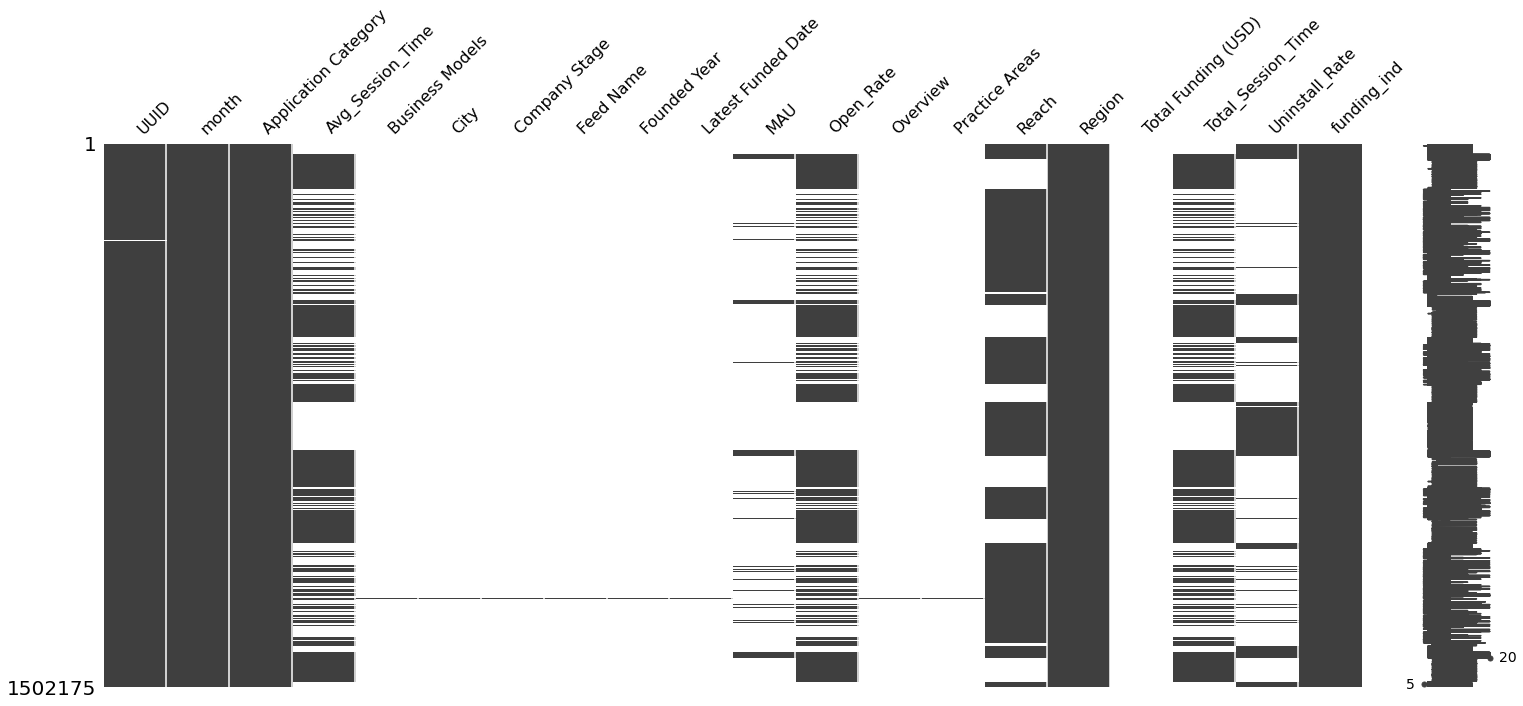

In [6]:
import missingno as msno
msno.matrix(df)

In [7]:
df.isnull().sum()

UUID                       1482
month                         0
Application Category          0
Avg_Session_Time         624443
Business Models         1499761
City                    1499768
Company Stage           1499761
Feed Name               1499761
Founded Year            1499761
Latest Funded Date      1499761
MAU                     1384088
Open_Rate                624460
Overview                1499761
Practice Areas          1499761
Reach                    451300
Region                        0
Total Funding (USD)     1499920
Total_Session_Time       624510
Uninstall_Rate          1149906
funding_ind                   0
dtype: int64

# We see a lot of missing values

In [8]:
df['Business Models'].value_counts()

Social Platforms > Interest Based > Education > Higher Education > Q&A Platforms\nTest Preparation Tech > Digital Learning > Diversified > Self-Paced                                                                                                           232
OTT Video > OTT Streaming Platforms > Video On Demand (VOD) > News                                                                                                                                                                                              124
K-12 EdTech > B2C Learning Solutions > School Curriculum > Multi Subject > Horizontal\nTest Preparation Tech > Digital Learning > Diversified > Self-Paced\nY Combinator Batches > 2020 > Winter                                                                117
Food & Beverage Products > Beverages > Juices and Dilutables > Juices > Cold-pressed                                                                                                                                        

In [9]:
df[~df['Business Models'].isna()]['City'].isnull().sum()

7

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


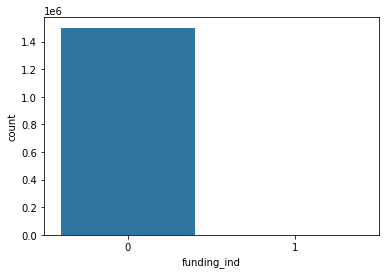

In [10]:
sns.countplot(df['funding_ind'])

In [11]:
df['funding_ind'].value_counts()

0    1499761
1       2414
Name: funding_ind, dtype: int64

In [12]:
df['Region'].value_counts()

National    1502175
Name: Region, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


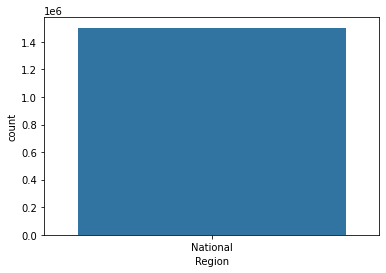

In [13]:
sns.countplot(df['Region'])

# So, Region column contains only a single value i.e National

In [14]:
df.drop('Region', axis = 1, inplace = True)

In [15]:
df['month'].value_counts()

20200301    291864
20200401    269271
20200601    163918
20200501    153682
20200201    104186
20200101    102074
20191201     96524
20191101     82189
20191001     16080
20190901     16080
20190801     16080
20190701     16080
20190601     15954
20190501     15803
20190401     15556
20190301     15266
20190201     14970
20190101     14719
20181201     14402
20181101     14142
20181001     13810
20180901     13539
20180801     13226
20180701     12760
Name: month, dtype: int64

In [16]:
df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,NaN,NaN,0.312500,0


In [18]:
df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,NaN,NaN,0.312500,0


In [19]:
df.dtypes

UUID                     object
month                     int64
Application Category     object
Avg_Session_Time        float64
Business Models          object
City                     object
Company Stage            object
Feed Name                object
Founded Year            float64
Latest Funded Date       object
MAU                     float64
Open_Rate               float64
Overview                 object
Practice Areas           object
Reach                   float64
Total Funding (USD)     float64
Total_Session_Time      float64
Uninstall_Rate          float64
funding_ind               int64
dtype: object

In [21]:
# Assign Date column to Date(Year-Month) instead of (Year-Month-Day)
# this column will be useful in analysis and visualization
df['Month'] = df['month'].astype('string').apply(lambda x: (str(x)[4:6]))

In [26]:
df['Month'] = df['Month'].astype('int')

In [27]:
import datetime

In [28]:
df['Month_Name'] = df['Month'].apply(lambda x: datetime.date(1900, x, 1).strftime('%b'))

In [29]:
df['Month_Name']

0          Aug
1          Aug
2          Aug
3          Aug
4          Aug
          ... 
1502170    Jan
1502171    Jan
1502172    Jan
1502173    Jan
1502174    Jan
Name: Month_Name, Length: 1502175, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


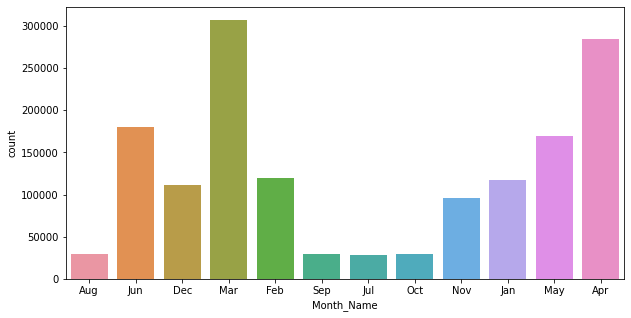

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(df['Month_Name'])

# We have app datas mostly from March month

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


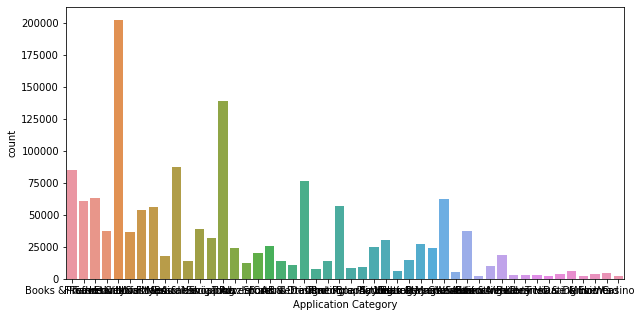

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(df['Application Category'])

In [39]:
df[~df['Avg_Session_Time'].isna()]['Avg_Session_Time']

29180      0.948620
29181      1.285343
29182      2.742948
29183      1.040757
29184      0.531213
             ...   
1487446    0.522869
1487447    0.374176
1487448    0.940800
1487449    0.361347
1487450    1.346300
Name: Avg_Session_Time, Length: 877732, dtype: float64

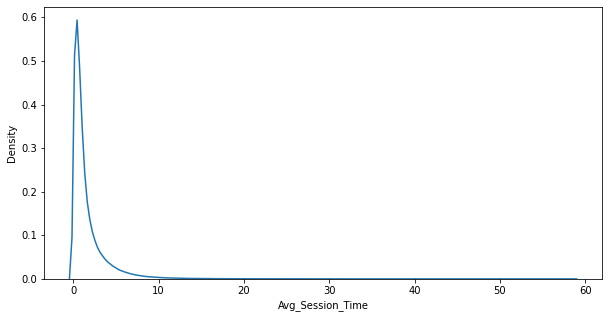

In [45]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['Avg_Session_Time'].dropna())